In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 21.5 MB/s 
     |████████████████████████████████| 9.8 MB 54.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Data wrangling

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array

#Machine Learning
from sklearn import preprocessing

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Stats
from sklearn.metrics import mean_absolute_error
from math import sqrt

#Arima
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
home3_meter_2014 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3-meter1_2014.csv')

home3_weather_2014 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3_weather_2014.csv')

home3_meter_2015 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3-meter1_2015.csv')

home3_weather_2015 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3_weather_2015.csv')

home3_meter_2016 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3-meter1_2016.csv')

home3_weather_2016 = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/Home3/Home3_weather_2016.csv')

In [ ]:
home3_meter=pd.concat([home3_meter_2014,home3_meter_2015,home3_meter_2016], axis=0)
home3_meter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282640 entries, 0 to 247599
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Date & Time                      282640 non-null  object 
 1   use [kW]                         282640 non-null  float64
 2   gen [kW]                         282640 non-null  float64
 3   Grid [kW]                        282640 non-null  float64
 4   AC [kW]                          282640 non-null  float64
 5   Furnace [kW]                     282640 non-null  float64
 6   Cellar Lights [kW]               282640 non-null  float64
 7   Washer [kW]                      282640 non-null  float64
 8   First Floor lights [kW]          282640 non-null  float64
 9   Utility Rm + Basement Bath [kW]  282640 non-null  float64
 10  Garage outlets [kW]              282640 non-null  float64
 11  MBed + KBed outlets [kW]         282640 non-null  float64
 12  Dr

In [ ]:
home3_meter

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247595,2016-12-31 23:55:00,0.406400,0.0,0.406400,0.000267,0.008950,0.005900,0.003450,0.051567,0.003333,0.004950,0.090567,0.000200,0.000433,0.003800,0.045867,0.004900,0.127633
247596,2016-12-31 23:56:00,0.405350,0.0,0.405350,0.000267,0.008950,0.005883,0.003433,0.051533,0.003350,0.004967,0.090017,0.000200,0.000433,0.003783,0.045967,0.004900,0.127083
247597,2016-12-31 23:57:00,0.404333,0.0,0.404333,0.000267,0.008900,0.005900,0.003433,0.051517,0.003350,0.004967,0.089817,0.000200,0.000450,0.003783,0.045933,0.004917,0.126417
247598,2016-12-31 23:58:00,0.403883,0.0,0.403883,0.000267,0.008900,0.005900,0.003450,0.051517,0.003350,0.004967,0.089850,0.000200,0.000433,0.003800,0.046017,0.004900,0.125833


In [ ]:
home3_meter.tail()
home3_meter.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [ ]:
home3_weather=pd.concat([home3_weather_2014,home3_weather_2015,home3_weather_2016], axis=0)
home3_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          26280 non-null  float64
 1   icon                 26280 non-null  object 
 2   humidity             26280 non-null  float64
 3   visibility           26280 non-null  float64
 4   summary              26280 non-null  object 
 5   apparentTemperature  26280 non-null  float64
 6   pressure             26279 non-null  float64
 7   windSpeed            26278 non-null  float64
 8   cloudCover           22740 non-null  float64
 9   time                 26280 non-null  int64  
 10  windBearing          26277 non-null  float64
 11  precipIntensity      26280 non-null  float64
 12  dewPoint             26280 non-null  float64
 13  precipProbability    26280 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
home3_weather.tail()
home3_weather.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.31,clear-night,0.47,10.0,Clear,7.74,1023.25,12.65,0.0,1388552400,283.0,0.0,3.30,0.0
1,19.22,clear-night,0.48,10.0,Clear,7.89,1023.21,9.99,0.0,1388556000,283.0,0.0,2.69,0.0
2,18.10,clear-night,0.52,10.0,Clear,8.11,1024.25,7.76,0.0,1388559600,255.0,0.0,3.42,0.0
3,17.47,clear-night,0.55,10.0,Clear,7.36,1025.02,7.73,0.0,1388563200,245.0,0.0,4.00,0.0
4,15.63,clear-night,0.61,10.0,Clear,6.98,1025.16,5.76,0.0,1388566800,220.0,0.0,4.45,0.0


In [ ]:
home3_meter[home3_meter.duplicated(subset = 'Date & Time', keep=False)]

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
14640,2014-11-02 01:00:00,0.687047,0.0,0.687047,0.000315,0.072863,0.007138,0.000274,0.003817,0.002389,0.005148,0.051621,0.000090,0.000302,0.000000,0.000000,0.000000,0.000000
14641,2014-11-02 01:00:00,0.483964,0.0,0.483964,0.000019,0.009070,0.010133,0.000276,0.003584,0.002243,0.004720,0.048174,0.000090,0.000261,0.000000,0.000000,0.000000,0.000000
14642,2014-11-02 01:30:00,0.400651,0.0,0.400651,0.000029,0.009996,0.006856,0.000321,0.003816,0.002388,0.005021,0.051043,0.000033,0.000212,0.000000,0.000000,0.000000,0.000000
14643,2014-11-02 01:30:00,0.474490,0.0,0.474490,0.000034,0.009326,0.018928,0.000294,0.003708,0.002368,0.004942,0.049934,0.000084,0.000261,0.000000,0.000000,0.000000,0.000000
14592,2015-11-01 01:00:00,0.405499,0.0,0.405499,0.000222,0.009156,0.006302,0.000231,0.031928,0.162807,0.004887,0.049157,0.000047,0.000251,0.002843,0.001021,0.004935,0.033344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167075,2016-11-06 01:57:00,0.319900,0.0,0.319900,0.000067,0.009750,0.005950,0.003283,0.031217,0.003283,0.004933,0.063167,0.000133,0.000367,0.002200,0.033017,0.004833,0.136933
167076,2016-11-06 01:58:00,0.319650,0.0,0.319650,0.000083,0.009750,0.005950,0.003267,0.031250,0.003283,0.004950,0.063117,0.000133,0.000367,0.002200,0.033083,0.004833,0.136333
167077,2016-11-06 01:58:00,0.316933,0.0,0.316933,0.000083,0.009717,0.005950,0.003283,0.031183,0.003283,0.004950,0.063167,0.000167,0.000333,0.002250,0.033100,0.004833,0.133300
167078,2016-11-06 01:59:00,0.319250,0.0,0.319250,0.000067,0.009750,0.005933,0.003283,0.031200,0.003283,0.004967,0.063383,0.000167,0.000367,0.002217,0.033050,0.004833,0.135333


In [ ]:
home3_weather['time'] = pd.to_datetime(home3_weather['time'],unit='s') - pd.Timedelta('05:00:00')
home3_weather

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.31,clear-night,0.47,10.00,Clear,7.74,1023.25,12.65,0.00,2014-01-01 00:00:00,283.0,0.0000,3.30,0.00
1,19.22,clear-night,0.48,10.00,Clear,7.89,1023.21,9.99,0.00,2014-01-01 01:00:00,283.0,0.0000,2.69,0.00
2,18.10,clear-night,0.52,10.00,Clear,8.11,1024.25,7.76,0.00,2014-01-01 02:00:00,255.0,0.0000,3.42,0.00
3,17.47,clear-night,0.55,10.00,Clear,7.36,1025.02,7.73,0.00,2014-01-01 03:00:00,245.0,0.0000,4.00,0.00
4,15.63,clear-night,0.61,10.00,Clear,6.98,1025.16,5.76,0.00,2014-01-01 04:00:00,220.0,0.0000,4.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,35.94,cloudy,0.75,9.51,Overcast,28.36,1013.10,10.54,1.00,2016-12-30 19:00:00,188.0,0.0000,28.66,0.00
8756,38.08,partly-cloudy-night,0.71,8.91,Partly Cloudy,30.20,1013.09,12.62,0.31,2016-12-30 20:00:00,197.0,0.0012,29.45,0.02
8757,36.65,rain,0.81,8.67,Light Rain,28.54,1012.47,12.22,NaN,2016-12-30 21:00:00,198.0,0.0140,31.27,0.55
8758,35.84,rain,0.84,7.96,Light Rain,29.57,1012.11,7.92,NaN,2016-12-30 22:00:00,196.0,0.0140,31.47,0.55


In [ ]:
home3_weather[home3_weather.duplicated(subset = 'time', keep=False)]

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability


Checking for Null values

In [ ]:
home3_weather.isna().any()

temperature            False
icon                   False
humidity               False
visibility             False
summary                False
apparentTemperature    False
pressure                True
windSpeed               True
cloudCover              True
time                   False
windBearing             True
precipIntensity        False
dewPoint               False
precipProbability      False
dtype: bool

In [ ]:
home3_weather.isna().sum()

temperature               0
icon                      0
humidity                  0
visibility                0
summary                   0
apparentTemperature       0
pressure                  1
windSpeed                 2
cloudCover             3540
time                      0
windBearing               3
precipIntensity           0
dewPoint                  0
precipProbability         0
dtype: int64

In [ ]:
home3_weather = home3_weather.drop(columns=['cloudCover'])

In [ ]:
home3_meter.isna().any()

Date & Time                        False
use [kW]                           False
gen [kW]                           False
Grid [kW]                          False
AC [kW]                            False
Furnace [kW]                       False
Cellar Lights [kW]                 False
Washer [kW]                        False
First Floor lights [kW]            False
Utility Rm + Basement Bath [kW]    False
Garage outlets [kW]                False
MBed + KBed outlets [kW]           False
Dryer + egauge [kW]                False
Panel GFI (central vac) [kW]       False
Home Office (R) [kW]               False
Dining room (R) [kW]               False
Microwave (R) [kW]                 False
Fridge (R) [kW]                    False
dtype: bool

In [ ]:
home3_meter.describe()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,282640.000000,282640.0,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,2.826400e+05,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000
mean,0.995805,0.0,0.995805,0.321797,0.114676,0.009114,0.004322,0.030102,0.143382,0.005440,8.041738e-02,0.026066,0.000686,0.111917,0.036157,0.012224,0.072175
std,0.991420,0.0,0.991420,0.840824,0.177040,0.016439,0.018313,0.038512,0.239914,0.006771,1.214435e-01,0.300285,0.007171,0.160469,0.021568,0.098170,0.074947
min,0.000183,0.0,0.000183,0.000000,0.000003,0.000000,0.000000,0.000033,0.000000,0.000000,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373648,0.0,0.373648,0.000083,0.009024,0.005533,0.002967,0.003770,0.003233,0.004800,5.528333e-02,0.000033,0.000233,0.003010,0.032333,0.004433,0.004000
50%,0.646826,0.0,0.646826,0.000317,0.009400,0.005833,0.003200,0.030000,0.003533,0.004900,6.216667e-02,0.000067,0.000300,0.005402,0.033267,0.004700,0.060010
75%,1.031254,0.0,1.031254,0.002400,0.213031,0.006050,0.003333,0.031867,0.123367,0.004983,6.991667e-02,0.000100,0.000383,0.239430,0.044533,0.004894,0.132933
max,9.381150,0.0,9.381150,4.303854,0.586683,0.186483,1.027884,0.878296,1.546676,0.697683,2.592283e+00,6.054800,0.768017,0.500833,0.911288,1.923833,1.132350


In [ ]:
home3_weather.summary.unique()

array(['Clear', 'Light Snow', 'Flurries', 'Overcast', 'Foggy', 'Drizzle',
       'Light Rain', 'Rain', 'Partly Cloudy', 'Breezy', 'Snow',
       'Mostly Cloudy', 'Heavy Snow', 'Rain and Breezy',
       'Breezy and Overcast', 'Heavy Rain', 'Light Rain and Breezy',
       'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy',
       'Light Snow and Breezy', 'Drizzle and Breezy', 'Drizzle and Windy',
       'Dry'], dtype=object)

In [ ]:
home3_meter.describe()


,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,282640.000000,282640.0,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,2.826400e+05,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000,282640.000000
mean,0.995805,0.0,0.995805,0.321797,0.114676,0.009114,0.004322,0.030102,0.143382,0.005440,8.041738e-02,0.026066,0.000686,0.111917,0.036157,0.012224,0.072175
std,0.991420,0.0,0.991420,0.840824,0.177040,0.016439,0.018313,0.038512,0.239914,0.006771,1.214435e-01,0.300285,0.007171,0.160469,0.021568,0.098170,0.074947
min,0.000183,0.0,0.000183,0.000000,0.000003,0.000000,0.000000,0.000033,0.000000,0.000000,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373648,0.0,0.373648,0.000083,0.009024,0.005533,0.002967,0.003770,0.003233,0.004800,5.528333e-02,0.000033,0.000233,0.003010,0.032333,0.004433,0.004000
50%,0.646826,0.0,0.646826,0.000317,0.009400,0.005833,0.003200,0.030000,0.003533,0.004900,6.216667e-02,0.000067,0.000300,0.005402,0.033267,0.004700,0.060010
75%,1.031254,0.0,1.031254,0.002400,0.213031,0.006050,0.003333,0.031867,0.123367,0.004983,6.991667e-02,0.000100,0.000383,0.239430,0.044533,0.004894,0.132933
max,9.381150,0.0,9.381150,4.303854,0.586683,0.186483,1.027884,0.878296,1.546676,0.697683,2.592283e+00,6.054800,0.768017,0.500833,0.911288,1.923833,1.132350


In [ ]:

home3_weather.summary.unique()

array(['Clear', 'Light Snow', 'Flurries', 'Overcast', 'Foggy', 'Drizzle',
       'Light Rain', 'Rain', 'Partly Cloudy', 'Breezy', 'Snow',
       'Mostly Cloudy', 'Heavy Snow', 'Rain and Breezy',
       'Breezy and Overcast', 'Heavy Rain', 'Light Rain and Breezy',
       'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy',
       'Light Snow and Breezy', 'Drizzle and Breezy', 'Drizzle and Windy',
       'Dry'], dtype=object)

In [ ]:
home3_weather.icon.unique()

array(['clear-night', 'clear-day', 'snow', 'cloudy', 'fog', 'rain',
       'partly-cloudy-night', 'wind', 'partly-cloudy-day'], dtype=object)

We decided to drop the icon column as summary column gives more insights 

In [ ]:
home3_weather=home3_weather.drop(columns=['icon'])

Summary column has categorical data so we want to encode it

---



In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
home3_weather['summary'] = le.fit_transform(home3_weather.summary.values)
home3_weather

,temperature,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,time,windBearing,precipIntensity,dewPoint,precipProbability
0,20.31,0.47,10.00,4,7.74,1023.25,12.65,2014-01-01 00:00:00,283.0,0.0000,3.30,0.00
1,19.22,0.48,10.00,4,7.89,1023.21,9.99,2014-01-01 01:00:00,283.0,0.0000,2.69,0.00
2,18.10,0.52,10.00,4,8.11,1024.25,7.76,2014-01-01 02:00:00,255.0,0.0000,3.42,0.00
3,17.47,0.55,10.00,4,7.36,1025.02,7.73,2014-01-01 03:00:00,245.0,0.0000,4.00,0.00
4,15.63,0.61,10.00,4,6.98,1025.16,5.76,2014-01-01 04:00:00,220.0,0.0000,4.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,35.94,0.75,9.51,18,28.36,1013.10,10.54,2016-12-30 19:00:00,188.0,0.0000,28.66,0.00
8756,38.08,0.71,8.91,19,30.20,1013.09,12.62,2016-12-30 20:00:00,197.0,0.0012,29.45,0.02
8757,36.65,0.81,8.67,13,28.54,1012.47,12.22,2016-12-30 21:00:00,198.0,0.0140,31.27,0.55
8758,35.84,0.84,7.96,13,29.57,1012.11,7.92,2016-12-30 22:00:00,196.0,0.0140,31.47,0.55


Home_meter had 30 minute intervals which we will convert into one hour intervals

In [ ]:
home3_meter['Date & Time'] = pd.to_datetime(home3_meter['Date & Time'])
home3_meter_hourly = home3_meter.resample('1H', on='Date & Time').sum()
home3_meter_hourly

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.961211,0.0,0.961211,0.001592,0.373869,0.010858,0.000169,0.014689,0.007348,0.009724,0.004269,0.000116,0.014380,0.128364,0.007888,0.009178,0.138597
2014-01-01 01:00:00,1.296874,0.0,1.296874,0.003591,0.828642,0.011060,0.000104,0.007027,0.006960,0.009840,0.004119,0.000291,0.014433,0.130141,0.006926,0.008658,0.131399
2014-01-01 02:00:00,0.594908,0.0,0.594908,0.000472,0.144112,0.010717,0.000173,0.007321,0.007614,0.009767,0.004220,0.000077,0.014319,0.126266,0.007728,0.008805,0.123515
2014-01-01 03:00:00,1.128584,0.0,1.128584,0.002928,0.678013,0.011016,0.000063,0.007144,0.007091,0.009844,0.004207,0.000243,0.014406,0.128419,0.007149,0.008573,0.127567
2014-01-01 04:00:00,0.842418,0.0,0.842418,0.001718,0.397099,0.010854,0.000174,0.007240,0.007300,0.009736,0.004198,0.000152,0.014311,0.134559,0.007871,0.008898,0.115868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,30.836233,0.0,30.836233,0.088717,13.971483,0.361633,0.198133,3.046550,0.188867,0.300833,4.639667,0.005233,0.023650,0.244300,2.730883,0.281800,1.622383
2016-12-31 20:00:00,35.904450,0.0,35.904450,0.106317,16.976900,0.358500,0.198217,3.085583,0.182833,0.295733,4.606400,0.003233,0.024600,0.236383,2.740967,0.278333,3.727600
2016-12-31 21:00:00,23.472433,0.0,23.472433,0.011683,0.538433,0.356550,0.203500,3.119950,0.198417,0.295817,4.651617,0.010900,0.024183,0.224650,2.755750,0.295867,7.541417


In [ ]:
home3_meter['Date & Time'] = pd.to_datetime(home3_meter['Date & Time'])
home3_meter_daily = home3_meter.resample('1D', on='Date & Time').sum()
home3_meter_daily

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,1305.989617,0.0,1305.989617,1.089733,118.067250,12.714117,4.557650,66.950950,228.448283,9.139617,100.414067,0.252800,0.580483,4.854983,56.345600,7.711683,99.579533
2016-12-28,1034.188833,0.0,1034.188833,1.343200,188.360283,14.619833,4.670817,88.465500,248.626917,8.562200,113.837150,0.175567,0.541133,5.440350,59.001583,6.724333,95.825283
2016-12-29,803.160200,0.0,803.160200,1.820817,236.991350,10.977100,4.908583,92.698850,17.121567,7.742317,153.294900,0.200633,0.614567,5.602867,55.837283,11.482117,91.942900


In [ ]:
home3_weather['time'] = pd.to_datetime(home3_weather['time'])
home3_weather = home3_weather.set_index('time')
home3_weather

,temperature,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,
2014-01-01 00:00:00,20.31,0.47,10.00,4,7.74,1023.25,12.65,283.0,0.0000,3.30,0.00
2014-01-01 01:00:00,19.22,0.48,10.00,4,7.89,1023.21,9.99,283.0,0.0000,2.69,0.00
2014-01-01 02:00:00,18.10,0.52,10.00,4,8.11,1024.25,7.76,255.0,0.0000,3.42,0.00
2014-01-01 03:00:00,17.47,0.55,10.00,4,7.36,1025.02,7.73,245.0,0.0000,4.00,0.00
2014-01-01 04:00:00,15.63,0.61,10.00,4,6.98,1025.16,5.76,220.0,0.0000,4.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,35.94,0.75,9.51,18,28.36,1013.10,10.54,188.0,0.0000,28.66,0.00
2016-12-30 20:00:00,38.08,0.71,8.91,19,30.20,1013.09,12.62,197.0,0.0012,29.45,0.02
2016-12-30 21:00:00,36.65,0.81,8.67,13,28.54,1012.47,12.22,198.0,0.0140,31.27,0.55


In [ ]:
merged_hourly = home3_meter_hourly.merge(home3_weather, left_index=True, right_index=True)
merged_hourly.index.name='Date & Time'
merged_hourly

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.961211,0.0,0.961211,0.001592,0.373869,0.010858,0.000169,0.014689,0.007348,0.009724,...,0.47,10.00,4,7.74,1023.25,12.65,283.0,0.0000,3.30,0.00
2014-01-01 01:00:00,1.296874,0.0,1.296874,0.003591,0.828642,0.011060,0.000104,0.007027,0.006960,0.009840,...,0.48,10.00,4,7.89,1023.21,9.99,283.0,0.0000,2.69,0.00
2014-01-01 02:00:00,0.594908,0.0,0.594908,0.000472,0.144112,0.010717,0.000173,0.007321,0.007614,0.009767,...,0.52,10.00,4,8.11,1024.25,7.76,255.0,0.0000,3.42,0.00
2014-01-01 03:00:00,1.128584,0.0,1.128584,0.002928,0.678013,0.011016,0.000063,0.007144,0.007091,0.009844,...,0.55,10.00,4,7.36,1025.02,7.73,245.0,0.0000,4.00,0.00
2014-01-01 04:00:00,0.842418,0.0,0.842418,0.001718,0.397099,0.010854,0.000174,0.007240,0.007300,0.009736,...,0.61,10.00,4,6.98,1025.16,5.76,220.0,0.0000,4.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,28.414200,0.0,28.414200,0.062417,9.239683,0.359083,0.197167,3.131050,0.188033,0.292967,...,0.75,9.51,18,28.36,1013.10,10.54,188.0,0.0000,28.66,0.00
2016-12-30 20:00:00,31.542083,0.0,31.542083,0.081133,12.419150,0.357583,0.198800,3.137567,0.183817,0.291350,...,0.71,8.91,19,30.20,1013.09,12.62,197.0,0.0012,29.45,0.02
2016-12-30 21:00:00,26.488683,0.0,26.488683,0.061050,8.778917,0.356667,0.201033,3.146433,0.189600,0.294350,...,0.81,8.67,13,28.54,1012.47,12.22,198.0,0.0140,31.27,0.55


In [ ]:
merged_hourly['Day of the week'] = merged_hourly.index.dayofweek
merged_hourly['Day of the month'] = merged_hourly.index.day
merged_hourly['Month'] = merged_hourly.index.month
merged_hourly['Year'] = merged_hourly.index.year
merged_hourly['Hour'] = merged_hourly.index.hour

In [ ]:
merged_hourly.tail(100)

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],...,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Day of the week,Day of the month,Month,Year,Hour
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-12-26 20:00:00,59.062717,0.0,59.062717,0.079733,13.186500,0.369283,0.192500,3.080550,0.181050,0.289583,...,3.63,185.0,0.0031,31.45,0.10,0,26,12,2016,20
2016-12-26 21:00:00,61.216700,0.0,61.216700,0.063417,10.300567,0.370033,0.193133,3.089800,0.184150,0.291583,...,7.25,180.0,0.0037,33.60,0.14,0,26,12,2016,21
2016-12-26 22:00:00,51.481550,0.0,51.481550,0.014583,0.547933,1.439600,0.194817,3.079083,0.191450,0.284117,...,8.42,186.0,0.0051,35.11,0.22,0,26,12,2016,22
2016-12-26 23:00:00,49.048450,0.0,49.048450,0.048500,7.378983,0.365767,0.196683,3.102433,0.187700,0.291783,...,8.66,200.0,0.0012,38.50,0.02,0,26,12,2016,23
2016-12-27 00:00:00,35.761983,0.0,35.761983,0.014767,0.537417,0.356917,0.199267,3.089733,0.194767,0.291867,...,12.25,200.0,0.0008,41.00,0.01,1,27,12,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,28.414200,0.0,28.414200,0.062417,9.239683,0.359083,0.197167,3.131050,0.188033,0.292967,...,10.54,188.0,0.0000,28.66,0.00,4,30,12,2016,19
2016-12-30 20:00:00,31.542083,0.0,31.542083,0.081133,12.419150,0.357583,0.198800,3.137567,0.183817,0.291350,...,12.62,197.0,0.0012,29.45,0.02,4,30,12,2016,20
2016-12-30 21:00:00,26.488683,0.0,26.488683,0.061050,8.778917,0.356667,0.201033,3.146433,0.189600,0.294350,...,12.22,198.0,0.0140,31.27,0.55,4,30,12,2016,21


In [ ]:
merged_hourly[merged_hourly.duplicated( keep=False)]

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],...,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Day of the week,Day of the month,Month,Year,Hour
Date & Time,,,,,,,,,,,,,,,,,,,,,


In [ ]:
merged_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2014-01-01 00:00:00 to 2016-12-30 23:00:00
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   use [kW]                         26280 non-null  float64
 1   gen [kW]                         26280 non-null  float64
 2   Grid [kW]                        26280 non-null  float64
 3   AC [kW]                          26280 non-null  float64
 4   Furnace [kW]                     26280 non-null  float64
 5   Cellar Lights [kW]               26280 non-null  float64
 6   Washer [kW]                      26280 non-null  float64
 7   First Floor lights [kW]          26280 non-null  float64
 8   Utility Rm + Basement Bath [kW]  26280 non-null  float64
 9   Garage outlets [kW]              26280 non-null  float64
 10  MBed + KBed outlets [kW]         26280 non-null  float64
 11  Dryer + egauge [kW]              26280 non-nu

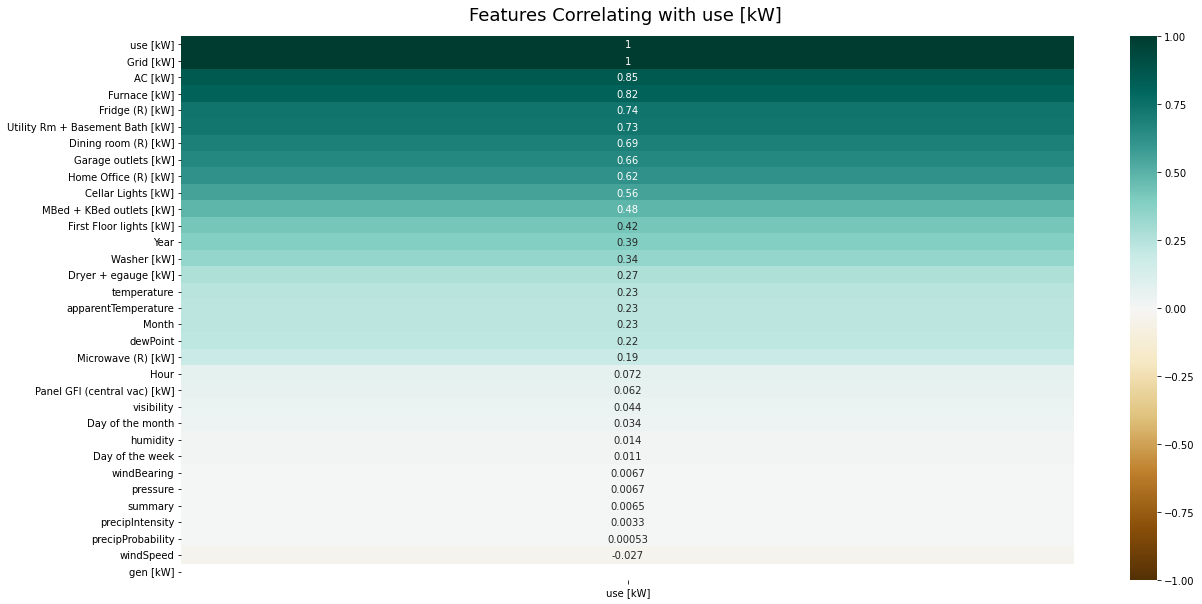

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(merged_hourly.corr()[['use [kW]']].sort_values(by='use [kW]', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with use [kW] ', fontdict={'fontsize':18}, pad=16);

In [ ]:
home3_weather_daily = home3_weather.resample('1D').agg({'temperature':'mean', 'humidity':'mean', 'visibility':'mean', 'summary':pd.Series.mode, 'apparentTemperature':'mean', 'pressure':'mean', 'windSpeed':'mean', 'windBearing':'mean', 'precipIntensity':'mean', 'dewPoint':'mean', 'precipProbability':'mean'})
merged_daily = home3_meter_daily.merge(home3_weather_daily, left_index=True, right_index=True)
merged_daily

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,...,0.552500,9.708750,4,13.156250,1026.902083,6.412500,236.416667,0.000000,6.619167,0.000000
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,...,0.811667,2.281667,15,1.476250,1020.227917,9.620833,28.041667,0.002688,8.934583,0.098333
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,...,0.653333,6.310417,4,-9.897083,1017.960833,10.912917,264.250000,0.001346,-5.067083,0.056250
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,...,0.597500,9.836250,4,-0.165417,1029.377500,6.027500,218.208333,0.000000,-5.176667,0.000000
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,...,0.761250,7.480833,4,18.720417,1023.551250,2.481667,177.333333,0.000721,14.093333,0.030833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,1708.969700,0.0,1708.969700,1.862067,284.999883,13.553133,21.555617,93.347167,4.425867,6.850583,...,0.699167,8.489583,4,20.975417,1035.866667,5.427917,101.791667,0.000546,18.075417,0.020000
2016-12-27,1305.989617,0.0,1305.989617,1.089733,118.067250,12.714117,4.557650,66.950950,228.448283,9.139617,...,0.723333,9.544583,4,41.850000,1009.815833,11.456667,256.333333,0.000688,37.045833,0.020833
2016-12-28,1034.188833,0.0,1034.188833,1.343200,188.360283,14.619833,4.670817,88.465500,248.626917,8.562200,...,0.606667,9.924167,4,27.759583,1017.188333,8.385833,290.250000,0.000000,21.862083,0.000000
2016-12-29,803.160200,0.0,803.160200,1.820817,236.991350,10.977100,4.908583,92.698850,17.121567,7.742317,...,0.857500,6.846667,4,26.380417,1008.845833,4.094167,168.708333,0.011388,26.151250,0.247083


In [ ]:
merged_daily.index.name = 'Date & Time'
merged_daily

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],...,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,...,0.552500,9.708750,4,13.156250,1026.902083,6.412500,236.416667,0.000000,6.619167,0.000000
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,...,0.811667,2.281667,15,1.476250,1020.227917,9.620833,28.041667,0.002688,8.934583,0.098333
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,...,0.653333,6.310417,4,-9.897083,1017.960833,10.912917,264.250000,0.001346,-5.067083,0.056250
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,...,0.597500,9.836250,4,-0.165417,1029.377500,6.027500,218.208333,0.000000,-5.176667,0.000000
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,...,0.761250,7.480833,4,18.720417,1023.551250,2.481667,177.333333,0.000721,14.093333,0.030833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,1708.969700,0.0,1708.969700,1.862067,284.999883,13.553133,21.555617,93.347167,4.425867,6.850583,...,0.699167,8.489583,4,20.975417,1035.866667,5.427917,101.791667,0.000546,18.075417,0.020000
2016-12-27,1305.989617,0.0,1305.989617,1.089733,118.067250,12.714117,4.557650,66.950950,228.448283,9.139617,...,0.723333,9.544583,4,41.850000,1009.815833,11.456667,256.333333,0.000688,37.045833,0.020833
2016-12-28,1034.188833,0.0,1034.188833,1.343200,188.360283,14.619833,4.670817,88.465500,248.626917,8.562200,...,0.606667,9.924167,4,27.759583,1017.188333,8.385833,290.250000,0.000000,21.862083,0.000000


**Splitting training and testing data**

In [ ]:
# create train test partition
date_first_dec_2016 = pd.Timestamp(year=2016, month=12, day=1)
train_hourly = merged_hourly[merged_hourly.index < date_first_dec_2016]
test_hourly = merged_hourly[merged_hourly.index >= date_first_dec_2016]
train_daily = merged_daily[merged_daily.index < date_first_dec_2016]
test_daily = merged_daily[merged_daily.index >= date_first_dec_2016]

In [ ]:
merged_hourly['Day of the week'] = merged_hourly.index.dayofweek
merged_hourly['Day of the month'] = merged_hourly.index.day
merged_hourly['Month'] = merged_hourly.index.month
merged_hourly['Year'] = merged_hourly.index.year
merged_hourly['Hour'] = merged_hourly.index.hour

In [ ]:
merged_daily['Day of the week'] = merged_daily.index.dayofweek
merged_daily['Day of the month'] = merged_daily.index.day
merged_daily['Month'] = merged_daily.index.month
merged_daily['Year'] = merged_daily.index.year

#Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f913b6c8d90>,
      dtype=object)

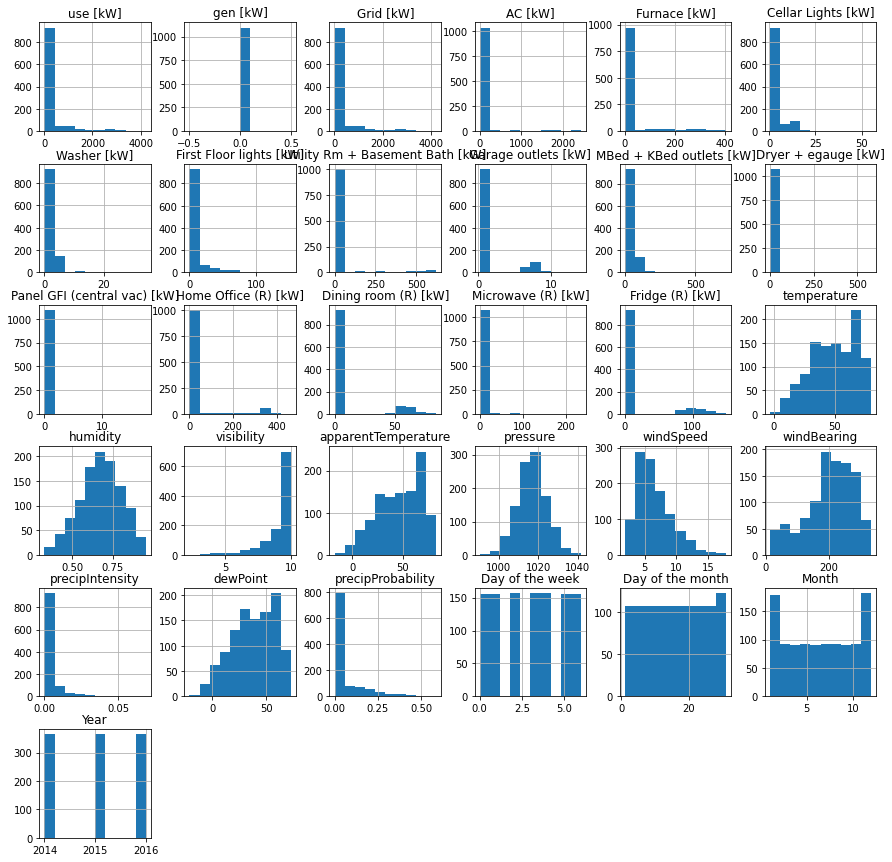

In [ ]:
merged_daily.hist(figsize =(15,15))

## **LSTM**

In [ ]:
LSTM_daily = merged_daily[["Furnace [kW]"	, "dewPoint","use [kW]","temperature","apparentTemperature","Day of the week",	"Day of the month", "Month"]]
LSTM_hourly = merged_hourly[["Furnace [kW]","dewPoint", "use [kW]","temperature","apparentTemperature","Day of the week",	"Day of the month", "Month","Hour"]]


**LSTM**

In [ ]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class
deep_learner = DeepModelTS(
data = merged_hourly,
Y_var = 'use [kW]',
lag = 6,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel()


Epoch 1/10
88/88 [==============================] - 5s 22ms/step - loss: 1.5981 - val_loss: 3026.3601
Epoch 2/10
88/88 [==============================] - 1s 16ms/step - loss: 1.2111 - val_loss: 1696.3890
Epoch 3/10
88/88 [==============================] - 1s 16ms/step - loss: 1.1273 - val_loss: 1733.8328
Epoch 4/10
88/88 [==============================] - 1s 16ms/step - loss: 1.1015 - val_loss: 1568.0358
Epoch 5/10
88/88 [==============================] - 1s 14ms/step - loss: 1.0790 - val_loss: 1609.9458
Epoch 6/10
88/88 [==============================] - 1s 14ms/step - loss: 1.0818 - val_loss: 1605.1644
Epoch 7/10
88/88 [==============================] - 1s 15ms/step - loss: 1.0353 - val_loss: 1572.5138
Epoch 8/10
88/88 [==============================] - 1s 13ms/step - loss: 1.0368 - val_loss: 1594.9736
Epoch 9/10
88/88 [==============================] - 1s 15ms/step - loss: 1.0304 - val_loss: 1554.0857
Epoch 10/10
88/88 [==============================] - 2s 18ms/step - loss: 1.0277 -

In [ ]:
deep_learner = DeepModelTS(
data = merged_hourly,
Y_var = 'use [kW]',
lag = 24, # 24 past hours are used
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)
model = deep_learner.LSTModel()

Epoch 1/10
88/88 [==============================] - 5s 31ms/step - loss: 8.2524 - val_loss: 100759.7109
Epoch 2/10
88/88 [==============================] - 3s 28ms/step - loss: 3.6389 - val_loss: 95572.1094
Epoch 3/10
88/88 [==============================] - 2s 28ms/step - loss: 3.4587 - val_loss: 8904.7324
Epoch 4/10
88/88 [==============================] - 2s 28ms/step - loss: 2.9028 - val_loss: 14248.4727
Epoch 5/10
88/88 [==============================] - 2s 28ms/step - loss: 2.7503 - val_loss: 4577.0039
Epoch 6/10
88/88 [==============================] - 2s 28ms/step - loss: 2.5928 - val_loss: 4694.3716
Epoch 7/10
88/88 [==============================] - 2s 28ms/step - loss: 2.1040 - val_loss: 69611.9922
Epoch 8/10
88/88 [==============================] - 3s 32ms/step - loss: 2.4628 - val_loss: 5070.7124
Epoch 9/10
88/88 [==============================] - 2s 28ms/step - loss: 1.7178 - val_loss: 39463.0078
Epoch 10/10
88/88 [==============================] - 2s 28ms/step - loss: 1.

In [ ]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = merged_hourly['use [kW]'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

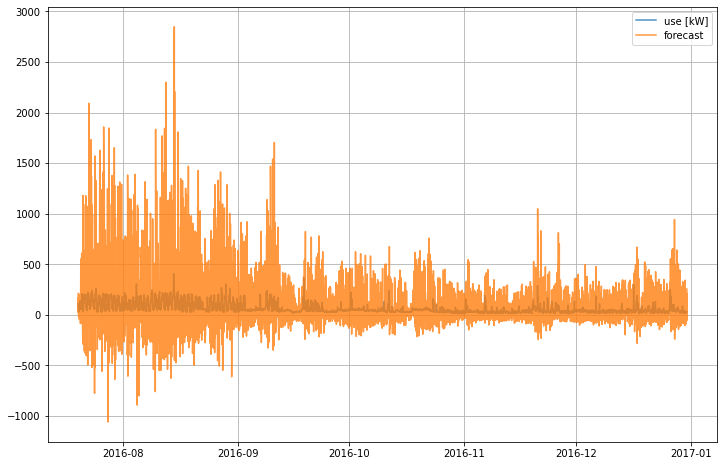

In [ ]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = merged_hourly.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['use [kW]', 'forecast']:
  plt.plot(
    'Date & Time',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:

LSTM_MAE_hourly = mean_absolute_error(fc['use [kW]'], fc['forecast'])
LSTM_MAE_hourly


186.67263547929156

In [ ]:
ass2_home2=fc[['Date & Time','use [kW]','forecast']] 

In [ ]:
ass2_home2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home3LSTM.csv',sep=',', index=False)

**Daily Predictions**

In [ ]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class
deep_learner = DeepModelTS(
data = merged_daily,
Y_var = 'use [kW]',
lag = 6,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
)

In [ ]:
model = deep_learner.LSTModel()


Epoch 1/10
5/5 [==============================] - 2s 12ms/step - loss: 528213.8125
Epoch 2/10
5/5 [==============================] - 0s 19ms/step - loss: 450555.9375
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 448020.2500
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 362956.5938
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 259019.9062
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 246387.0938
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 206119.5469
Epoch 8/10
5/5 [==============================] - 0s 13ms/step - loss: 153017.2344
Epoch 9/10
5/5 [==============================] - 0s 10ms/step - loss: 107961.2266
Epoch 10/10
5/5 [==============================] - 0s 10ms/step - loss: 107522.0156


In [ ]:
deep_learner = DeepModelTS(
data = merged_daily,
Y_var = 'use [kW]',
lag = 24, # 24 past hours are used
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)
model = deep_learner.LSTModel()

Epoch 1/10
4/4 [==============================] - 3s 226ms/step - loss: 27422.1387 - val_loss: 1205950.5000
Epoch 2/10
4/4 [==============================] - 0s 53ms/step - loss: 26410.1719 - val_loss: 767375.0625
Epoch 3/10
4/4 [==============================] - 0s 58ms/step - loss: 25412.1113 - val_loss: 611549.1875
Epoch 4/10
4/4 [==============================] - 0s 57ms/step - loss: 24617.1406 - val_loss: 776326.1875
Epoch 5/10
4/4 [==============================] - 0s 69ms/step - loss: 23725.4199 - val_loss: 976606.6875
Epoch 6/10
4/4 [==============================] - 0s 55ms/step - loss: 22763.5605 - val_loss: 998979.7500
Epoch 7/10
4/4 [==============================] - 0s 66ms/step - loss: 22809.0176 - val_loss: 1100471.0000
Epoch 8/10
4/4 [==============================] - 0s 51ms/step - loss: 22367.1465 - val_loss: 836996.3750
Epoch 9/10
4/4 [==============================] - 0s 53ms/step - loss: 22060.6035 - val_loss: 1236362.0000
Epoch 10/10
4/4 [=========================

In [ ]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = merged_daily['use [kW]'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

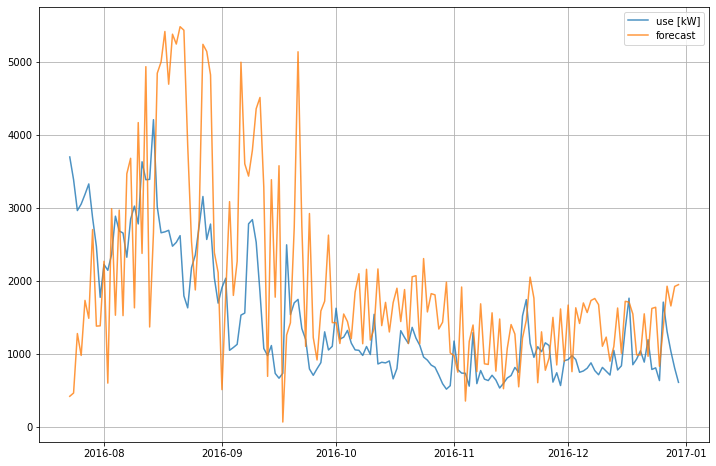

In [ ]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = merged_daily.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['use [kW]', 'forecast']:
  plt.plot(
    'Date & Time',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:

LSTM_MAE_daily = mean_absolute_error(fc['use [kW]'], fc['forecast'])
LSTM_MAE_daily 


942.772340974432

**ARIMA Model**

To build a time-series model, one that you can use to predict future values, the dataset needs to be stationary.

Using Dickey-Fuller Test helps to verify whether the data series is Stationary or not. For our time series to be stationary, the p-value from the test has to be ≤ 0.01.

In [ ]:
ds=merged_daily.iloc[:,[0]]
ds_hourly=merged_hourly.iloc[:,[0]]
array(ds)
array(ds_hourly)

array([[ 0.96121055],
       [ 1.29687444],
       [ 0.59490778],
       ...,
       [26.48868333],
       [24.26138334],
       [27.19813333]])

In [ ]:
#Augmented Dickey-Fuller Test
# log_dataset: boolean indicating if we want to log-transform the dataset before running Augmented Dickey-Fuller test
from numpy import log
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset, log_dataset):
    ds = dataset
    if log_dataset:
        ds = dataset.apply(lambda x: log(x))
        ds.dropna(inplace=True)  
    result = adfuller(ds)  
    print('Augmented Dickey-Fuller Test')
    print('test statistic: %.10f' % result[0])
    print('p-value: %.10f' % result[1])
    print('critical values')
    for key, value in result[4].items():
        print('\t%s: %.10f' % (key, value))


In [ ]:
adf_test(ds,True)

Augmented Dickey-Fuller Test
test statistic: -1.1358184261
p-value: 0.7005786875
critical values
	1%: -3.4363746281
	5%: -2.8642001336
	10%: -2.5681863436


In [ ]:
adf_test(ds,False)

Augmented Dickey-Fuller Test
test statistic: -2.7490500815
p-value: 0.0659281997
critical values
	1%: -3.4364647646
	5%: -2.8642398922
	10%: -2.5682075190


Both the normal dataset as well as the log-transformed dataset has the p value greater than 0.01, so we are going to differencing the dataset.

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for Home3 daily')
    plt.show(block=False)

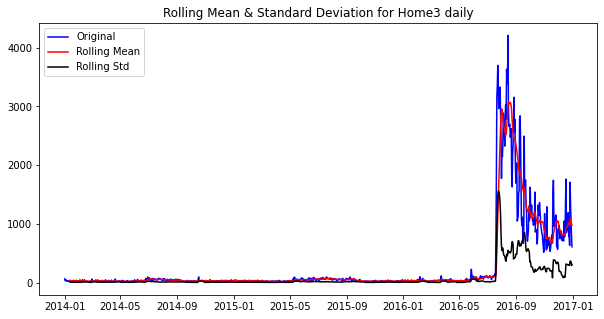

In [ ]:
test_stationarity(ds)

**Differencing**

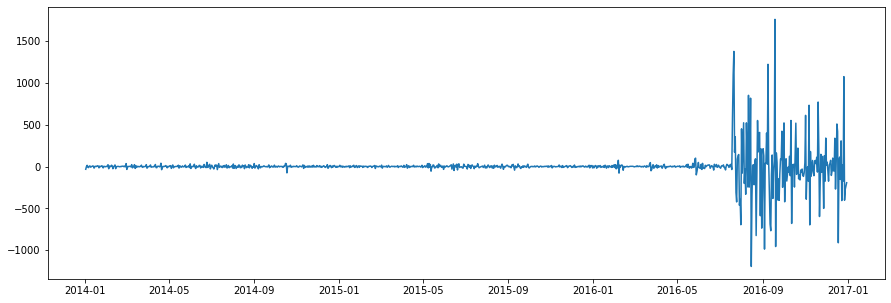

In [ ]:
diff_data = merged_daily.iloc[:,[0]].diff()
diff_data.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.plot(diff_data)
plt.show()

Testing the differencing data for Stationarity.

In [ ]:
adf_test(diff_data,False)

Augmented Dickey-Fuller Test
test statistic: -6.2072570148
p-value: 0.0000000562
critical values
	1%: -3.4364704878
	5%: -2.8642424166
	10%: -2.5682088635


For normal values, we can see that the p value is less than 0.01. So we can consider this differenced data as Stationary.


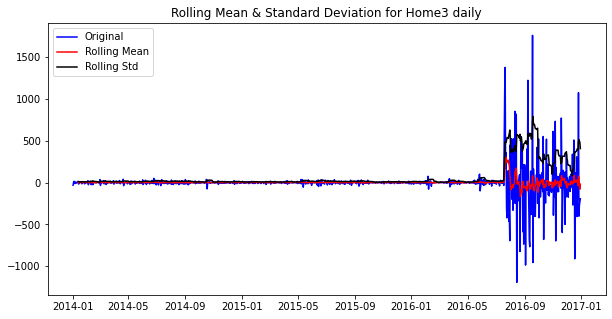

In [ ]:
test_stationarity(diff_data)

We can see a huge difference in the data for the year 2016, due to which it is hard to predict usage values

**Auto-regressive: AR(p)**

In [ ]:
dta=diff_data

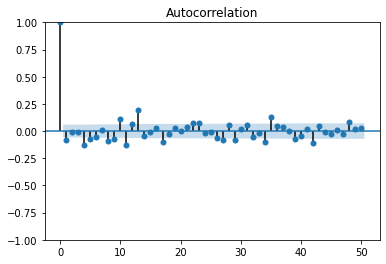

In [ ]:
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=50)
plt.show()

**Integrated: I(d)**
How many times the dataset was differenced, which is indicated by the value of parameter d. Since we differenced the data once, the value of d is one.

**Moving Average: MA (q)**

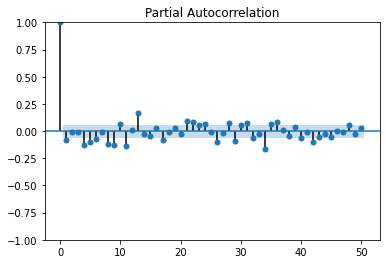

In [ ]:

sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=50, method="yw")
plt.show()

In [ ]:
import pmdarima as pm

model = pm.auto_arima(diff_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      start_Q=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15063.163, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14697.761, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15061.164, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14553.744, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14523.141, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14488.556, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=14454.257, Time=0.29 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=14408.181, Time=0.42 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=14402.735, Time=0.51 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=14397.730, Time=0.69 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=14329.564, Time=0.77 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=14331.166, Time=1.00 sec
 ARIMA(9,1,1)(0,0,0)[0] interc

In [ ]:
model = ARIMA(ds, order=(9,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               use [kW]   No. Observations:                 1095
Model:                 ARIMA(9, 1, 1)   Log Likelihood               -7071.864
Date:                Sun, 10 Apr 2022   AIC                          14165.729
Time:                        18:49:34   BIC                          14220.702
Sample:                    01-01-2014   HQIC                         14186.531
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6367      0.059    -10.809      0.000      -0.752      -0.521
ar.L2         -0.0916      0.015     -6.312      0.000      -0.120      -0.063
ar.L3         -0.0625      0.014     -4.313      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
# evaluate an ARIMA model using a walk-forward validation

def arima_model(electrictydata,testsize,p,d,q):
	X = electrictydata.values
	size = int(len(X) -testsize)
	train, test = X[0:size], X[size:len(X)]
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		model = ARIMA(history, order=(p,d,q))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
	# evaluate forecasts
	rmse = sqrt(mean_squared_error(test, predictions))
	mae=mean_absolute_error(predictions , test) 
	mape = np.mean(np.abs(predictions - test)/np.abs(test))
	print('Test RMSE: %.3f' % rmse)
	print('Test MAE: %.3f' % mae)
	print('Test MAPE: %.3f' % mape)

	# Constructing the forecast dataframe
	fc = electrictydata.tail(len(predictions)).copy()
	fc.reset_index(inplace=True)
	fc['predicted'] = predictions
	ass2=fc[['Date & Time','use [kW]','predicted']]
	ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home3Arima.csv',sep=',', index=False)

	fc.rename(columns = {'use [kW]': 'actual'}, 
          inplace=True)
	plt.figure(figsize=(12, 5))
	plt.title("Arima model for hourly prediction for December 2016 for HOME 3 dataset.")
	for dtype in ['actual', 'predicted']:
		plt.plot(
    	'Date & Time',
    	dtype,
    	data=fc,
    	label=dtype,
    	alpha=0.8
		)
 		
	plt.legend()
	plt.grid()
	plt.show()


In [ ]:
X = ds
arima_model(X,30,9,1,1)

predicted=953.245333, expected=921.430683
predicted=942.912261, expected=973.647000
predicted=1028.243611, expected=922.198167
predicted=856.296151, expected=746.928917
predicted=785.113927, expected=765.099833


KeyboardInterrupt: ignored

In [ ]:
ds

**ARIMA for Hourly time intervals**

In [ ]:
adf_test(ds_hourly,False)

Augmented Dickey-Fuller Test
test statistic: -3.7569956406
p-value: 0.0033792573
critical values
	1%: -3.4305993305
	5%: -2.8616501968
	10%: -2.5668286545


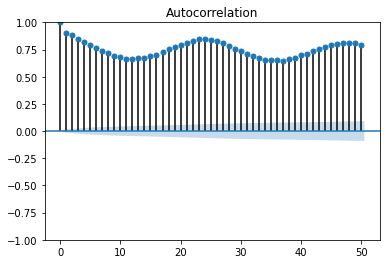

In [ ]:
sm.graphics.tsa.plot_acf(ds_hourly.values.squeeze(), lags=50)
plt.show()

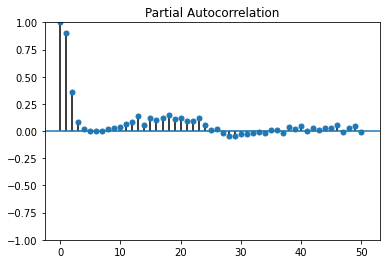

In [ ]:
sm.graphics.tsa.plot_pacf(ds_hourly.values.squeeze(), lags=50, method="yw")
plt.show()

predicted=23.172686, expected=31.303683
predicted=27.451337, expected=19.337750
predicted=22.268295, expected=15.204900
predicted=17.842016, expected=14.566700
predicted=15.723560, expected=13.946700
predicted=14.528934, expected=17.622900
predicted=16.168769, expected=45.450833
predicted=32.809580, expected=43.844867
predicted=38.473869, expected=41.136350
predicted=39.157713, expected=40.758950
predicted=39.211345, expected=42.658050
predicted=40.324255, expected=40.414650
predicted=39.475134, expected=24.508883
predicted=29.996518, expected=24.772183
predicted=26.397620, expected=31.672867
predicted=28.940525, expected=28.762467
predicted=28.273698, expected=133.397750
predicted=88.151349, expected=47.470883
predicted=62.456497, expected=42.482867
predicted=49.439334, expected=42.874117
predicted=44.500757, expected=53.184000
predicted=48.459707, expected=39.024550
predicted=41.904122, expected=36.654933
predicted=37.944223, expected=34.653483
predicted=35.225278, expected=33.415583

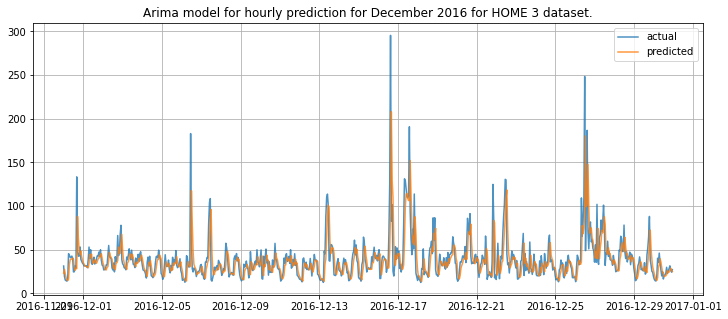

In [ ]:
X = ds_hourly
arima_model(X,744,1,0,1)

In [ ]:
fc

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],...,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Day of the week,Day of the month,Month,Year,forecast
0,2016-07-23,3698.488033,0.0,3698.488033,2337.393317,389.856617,10.988017,4.390683,57.126700,614.893067,...,8.660833,293.708333,0.000275,61.185000,0.006667,5,23,7,2016,417.985352
1,2016-07-24,3387.779500,0.0,3387.779500,2006.906817,341.291250,13.963950,16.456233,29.976067,537.719083,...,4.966250,268.708333,0.000000,57.785417,0.000000,6,24,7,2016,462.504242
2,2016-07-25,2963.942317,0.0,2963.942317,2208.331417,370.265983,12.035417,4.786900,53.533833,4.884550,...,5.691250,198.625000,0.000550,64.627500,0.017500,0,25,7,2016,1277.914062
3,2016-07-26,3052.829850,0.0,3052.829850,2149.335117,363.743667,11.504517,4.626933,63.808167,282.394600,...,8.272500,287.250000,0.000000,62.175833,0.000000,1,26,7,2016,977.952026
4,2016-07-27,3185.335783,0.0,3185.335783,2203.512850,372.442133,10.822367,4.394733,41.013333,602.311267,...,3.557917,255.666667,0.000000,59.016667,0.000000,2,27,7,2016,1732.552124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2016-12-26,1708.969700,0.0,1708.969700,1.862067,284.999883,13.553133,21.555617,93.347167,4.425867,...,5.427917,101.791667,0.000546,18.075417,0.020000,0,26,12,2016,1362.606934
157,2016-12-27,1305.989617,0.0,1305.989617,1.089733,118.067250,12.714117,4.557650,66.950950,228.448283,...,11.456667,256.333333,0.000688,37.045833,0.020833,1,27,12,2016,1926.883423
158,2016-12-28,1034.188833,0.0,1034.188833,1.343200,188.360283,14.619833,4.670817,88.465500,248.626917,...,8.385833,290.250000,0.000000,21.862083,0.000000,2,28,12,2016,1656.308105
159,2016-12-29,803.160200,0.0,803.160200,1.820817,236.991350,10.977100,4.908583,92.698850,17.121567,...,4.094167,168.708333,0.011388,26.151250,0.247083,3,29,12,2016,1924.133179


In [ ]:
ass2=fc[['Date & Time','use [kW]','forecast']]

In [ ]:
ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home3Arima.csv',sep=',', index=False)